In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from zea.tools.selection_tool import interactive_selector, interpolate_masks

zea: Using backend 'jax'


In [2]:
num_frames = 10
num_mask_to_draw = 3
image_size = (100, 100)
figsize = (11, 3)
fps = 10

...Plot will close after 1 selections...


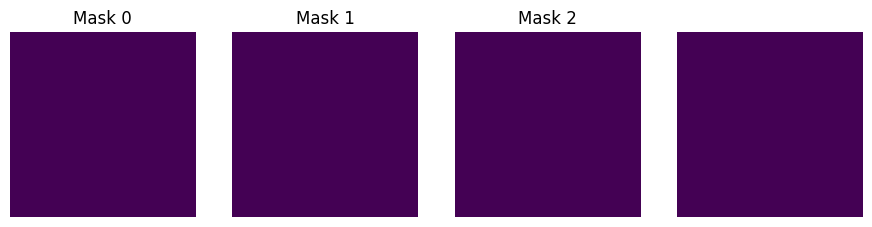

KeyboardInterrupt: 

In [4]:
data = np.ones(image_size)

fig, axs = plt.subplots(1, num_mask_to_draw + 1, figsize=figsize)
for i, ax in enumerate(axs):
    ax.imshow(data)
    if i < len(axs) - 1:
        ax.set_title(f"Mask {i}")
    ax.axis('off')

masks = []
for ax in axs[:-1]:
    _, mask = interactive_selector(data, ax, selector="lasso", num_selections=1)
    ax.imshow(mask[0])
    masks.append(mask[0])

interpolated_masks = interpolate_masks(masks, num_frames)

interpolated_masks = interpolated_masks + interpolated_masks[::-1][1:]

num_frames = len(interpolated_masks)

# Plot the animation of intermediate frames in the third subplot
animation_img = axs[-1].imshow(interpolated_masks[0])
axs[-1].set_title('Intermediate Frames')

# Function to update the animation frame
def update(frame):
    animation_img.set_array(interpolated_masks[frame])
    return animation_img,

# Create an animation
ani = FuncAnimation(fig, update, frames=num_frames, interval=1000 / fps)
ani.save('lasso_test.gif', writer='imagemagick')
plt.show()